In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Necessary libraries

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Reading data file

In [12]:
df = pd.read_csv("adult.csv")

In [13]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [14]:
df.shape

(48842, 15)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [16]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Checking for Null values

In [17]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### There are no null values as such, but there are rows in Occupation,workclass and native_country columns which have "?"

In [18]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [19]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [20]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

### Native country is not a significant feature thus we can ignore, but we need to treat the ? data in workclass and occupation. Thus we can drop the ? rows

In [21]:
# Replacing ? with na and dropping 
df.replace(to_replace='?',value=np.nan,inplace=True)

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(45222, 15)

### ~ 3000 rows have been dropped

In [24]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Univariate Analysis

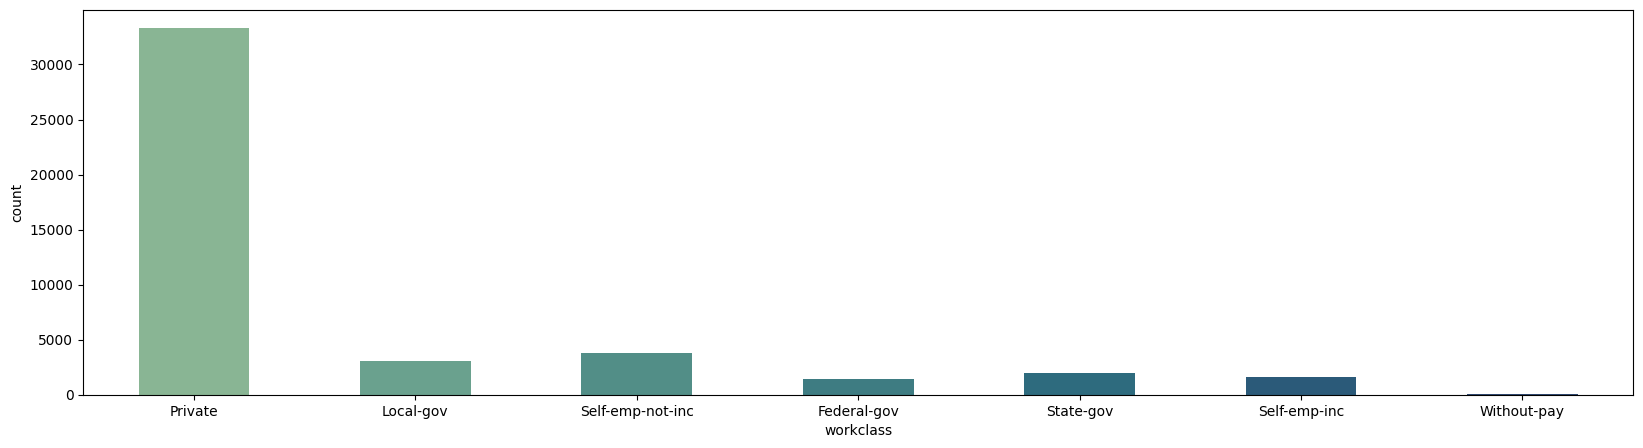

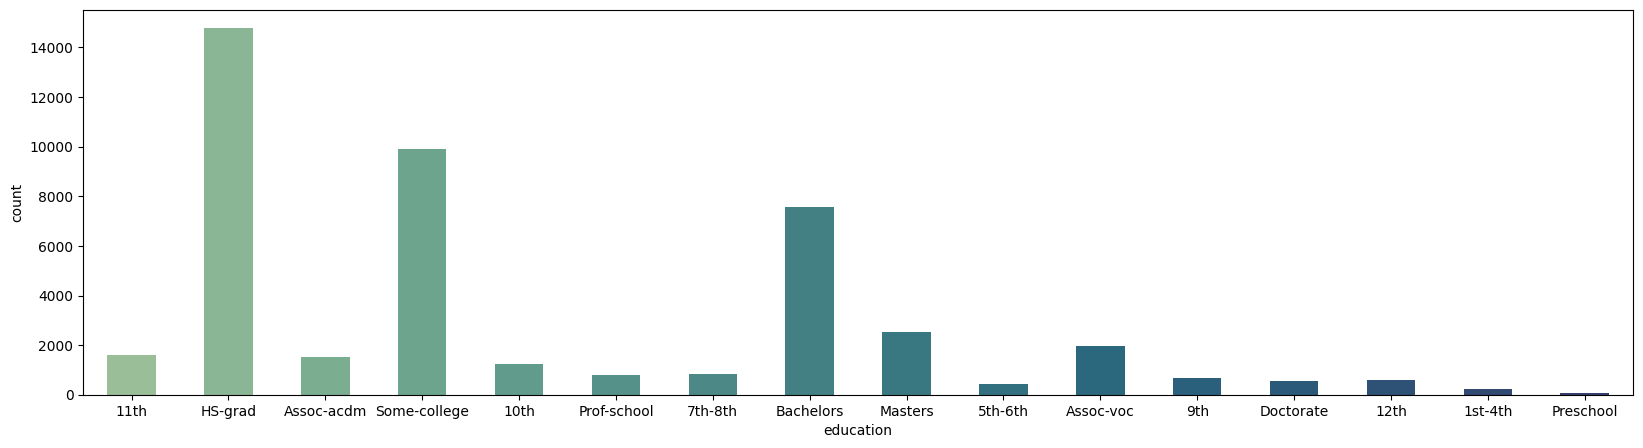

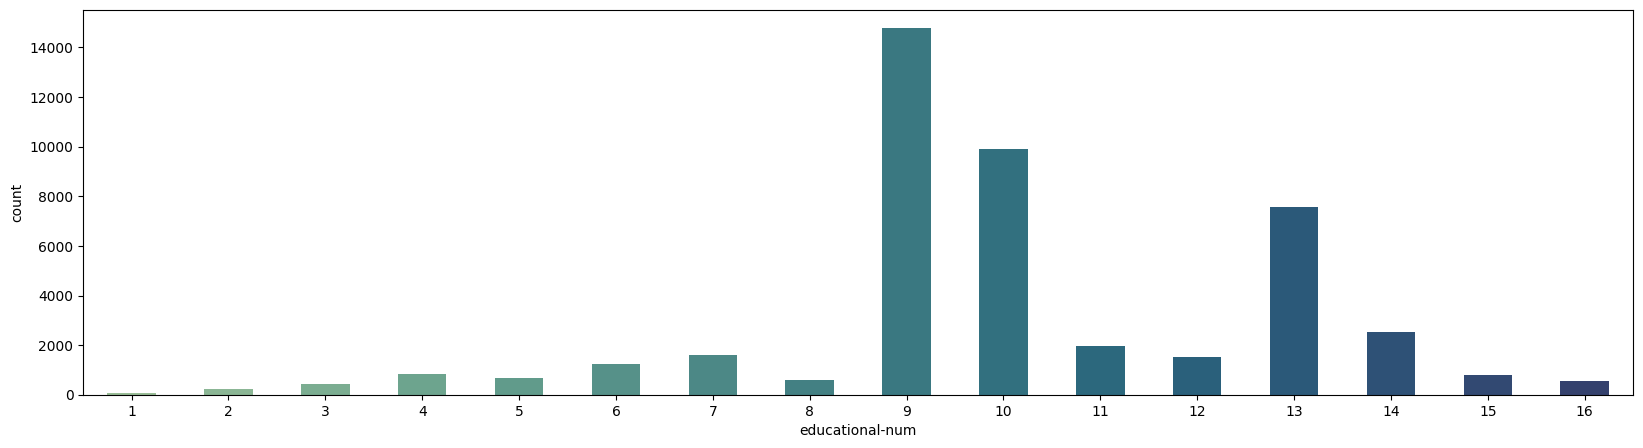

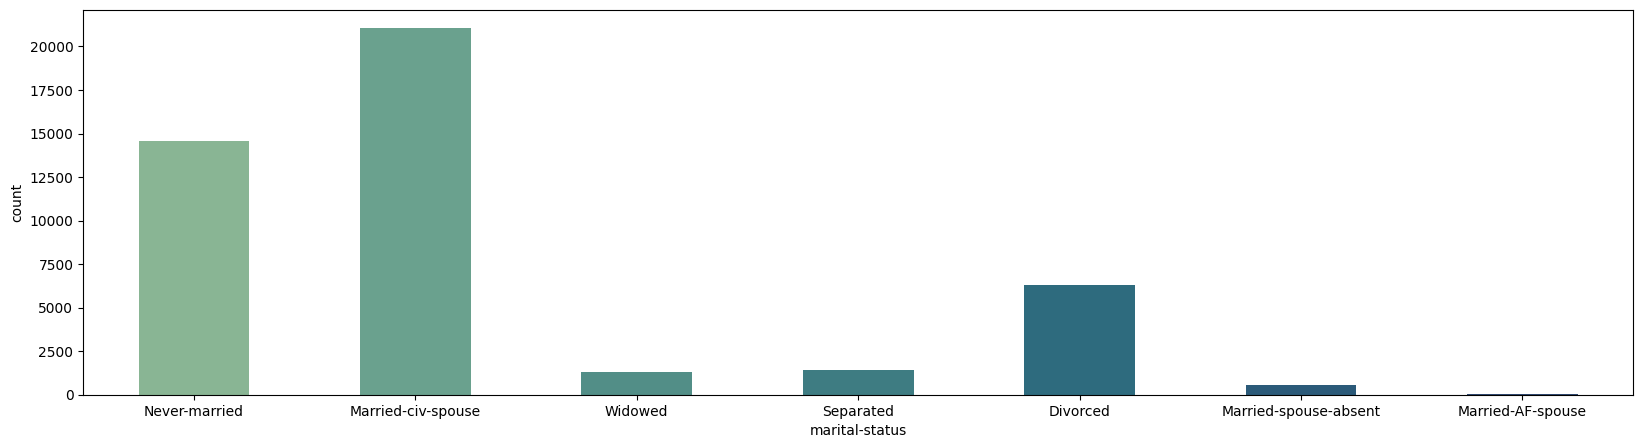

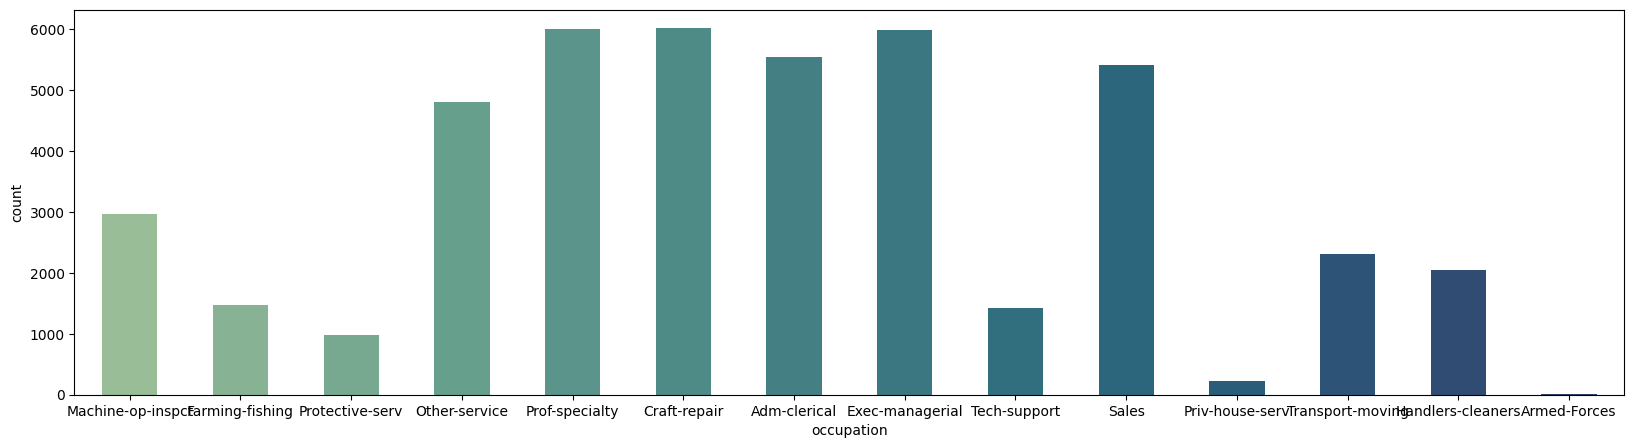

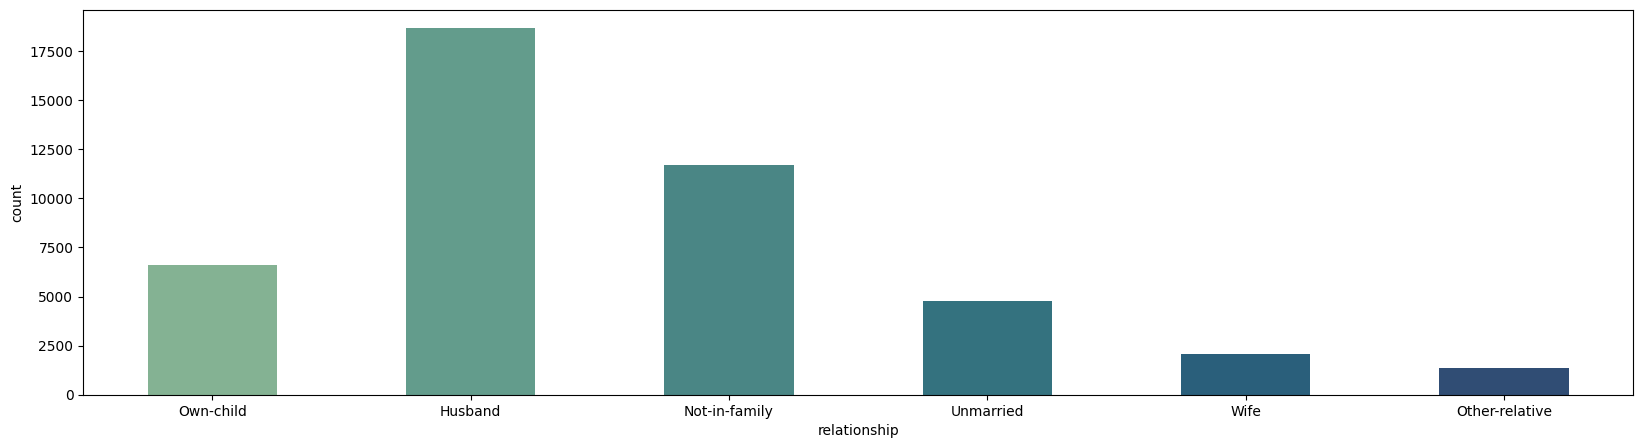

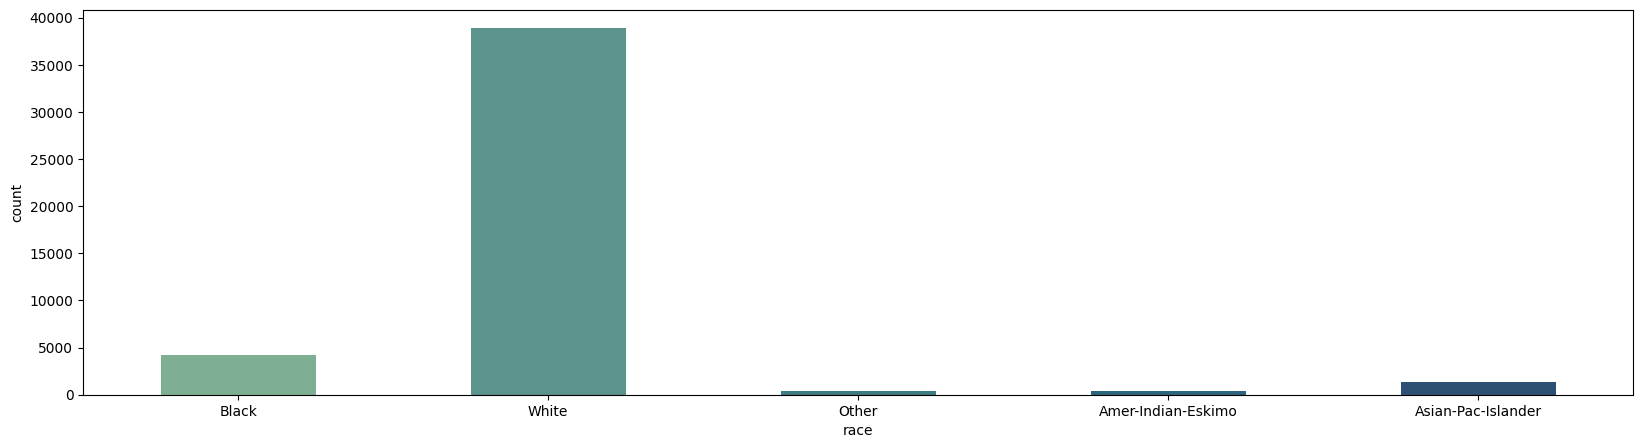

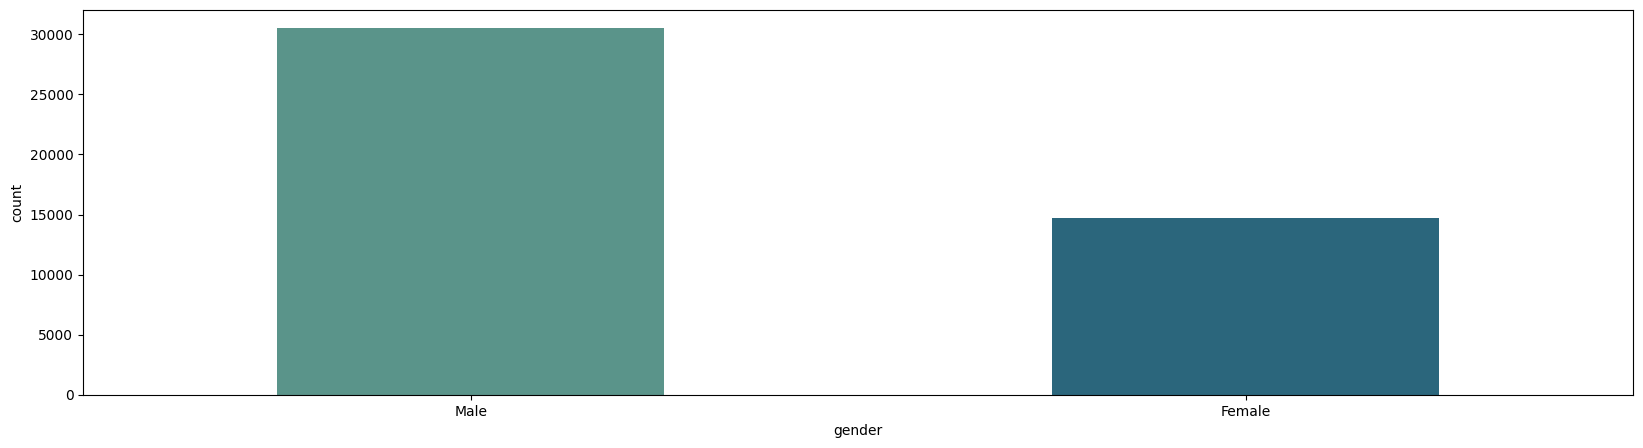

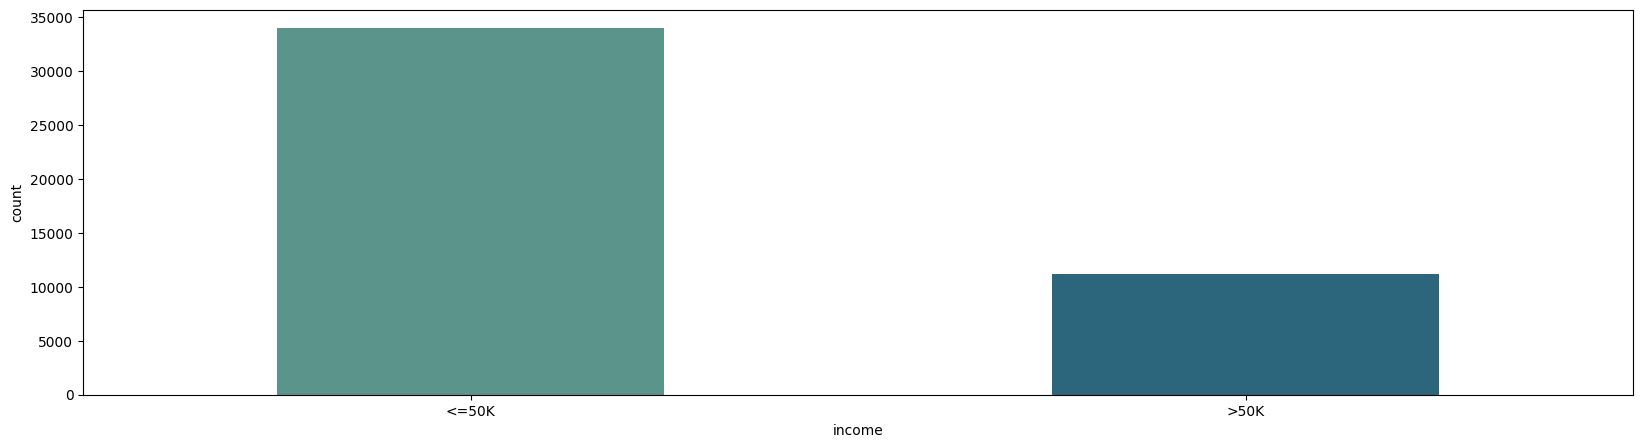

In [25]:
for col in df.columns:
  if len(df[col].unique()) <20 :
    plt.figure(figsize=(20,5))
    sns.countplot(x=col, data=df,width=0.5,palette='crest')
plt.show()

## Checking for duplicates

In [26]:
df.duplicated().sum()

47

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

0

-------------

### Plots

<Axes: xlabel='income', ylabel='count'>

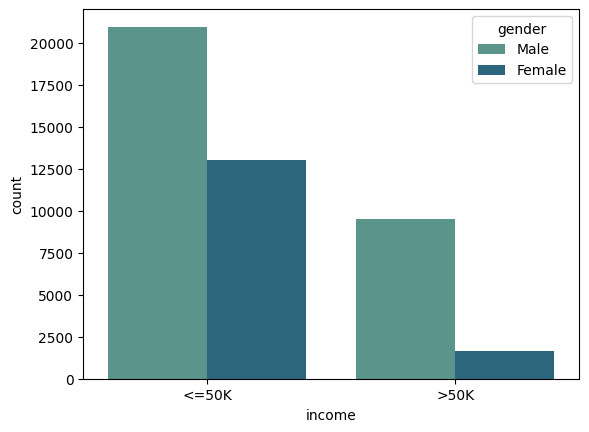

In [29]:
sns.countplot(x=df['income'],hue=df['gender'],palette='crest')

## Dropping columns which will not help in analysis

In [30]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [31]:
df = df[['age','workclass','education','occupation','race','gender','capital-gain','hours-per-week','income']]

In [32]:
df.shape

(45175, 9)

c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(

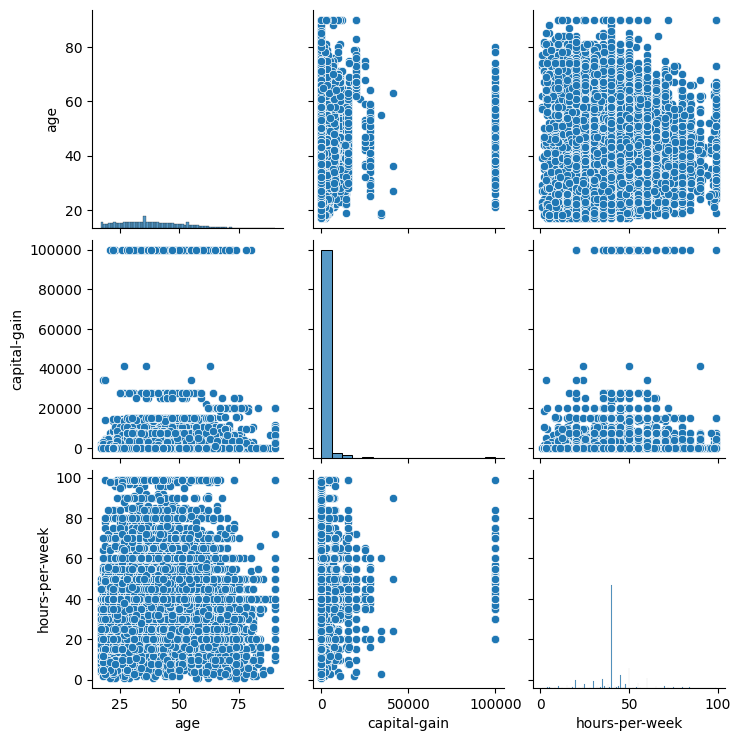

In [33]:
sns.pairplot(df,palette='crest')

<Axes: xlabel='income', ylabel='age'>

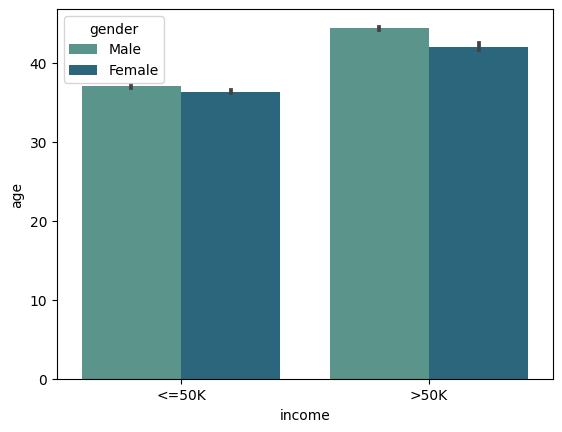

In [34]:
sns.barplot(x=df['income'],y=df['age'],hue=df['gender'],palette='crest')

# Converting categorical data to numeric

In [35]:
df.columns

Index(['age', 'workclass', 'education', 'occupation', 'race', 'gender',
       'capital-gain', 'hours-per-week', 'income'],
      dtype='object')

In [36]:
le = LabelEncoder()

df.workclass = le.fit_transform(df.workclass)
df.education = le.fit_transform(df.education)
df.occupation = le.fit_transform(df.occupation)
df.race = le.fit_transform(df.race)
df.gender = le.fit_transform(df.gender)
df.income = le.fit_transform(df.income)

In [37]:
df.head()

,age,workclass,education,occupation,race,gender,capital-gain,hours-per-week,income
0,25,2,1,6,2,1,0,40,0
1,38,2,11,4,4,1,0,50,0
2,28,1,7,10,4,1,0,40,1
3,44,2,15,6,2,1,7688,40,1
5,34,2,0,7,4,1,0,30,0


## KNN Model

----    

In [38]:
# Training and Testing data
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [39]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Scaling Data

In [40]:
ss = StandardScaler()

In [41]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [42]:
# Model
knn_mod = KNeighborsClassifier(n_neighbors=5)
knn_mod.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
# Predict
y_pred = knn_mod.predict(x_test)

In [44]:
# Accuracy

print("Training : ",accuracy_score(y_train,knn_mod.predict(x_train))*100)


print("Testing : ",accuracy_score(y_test,y_pred)*100)

Training :  85.53126729385723
Testing :  80.13281682346431


In [45]:
confusion_matrix(y_test,y_pred)

array([[6099,  709],
       [1086, 1141]], dtype=int64)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      6808
           1       0.62      0.51      0.56      2227

    accuracy                           0.80      9035
   macro avg       0.73      0.70      0.72      9035
weighted avg       0.79      0.80      0.79      9035



In [47]:
mod1 = KNeighborsClassifier(n_neighbors=9).fit(x_train,y_train)
y_pred9=mod1.predict(x_test)
print(classification_report(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      6808
           1       0.65      0.49      0.56      2227

    accuracy                           0.81      9035
   macro avg       0.75      0.70      0.72      9035
weighted avg       0.80      0.81      0.80      9035



In [48]:
mod2 = KNeighborsClassifier(n_neighbors=15).fit(x_train,y_train)
y_pred15=mod2.predict(x_test)
print(classification_report(y_test,y_pred15))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      6808
           1       0.67      0.48      0.56      2227

    accuracy                           0.81      9035
   macro avg       0.76      0.70      0.72      9035
weighted avg       0.80      0.81      0.80      9035

